In [1]:
from Manuel_BayesTRPL_Utilities import *
from Manuel_BayesTRPL_Plotting_Paper import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Files ready...
(10, 100)


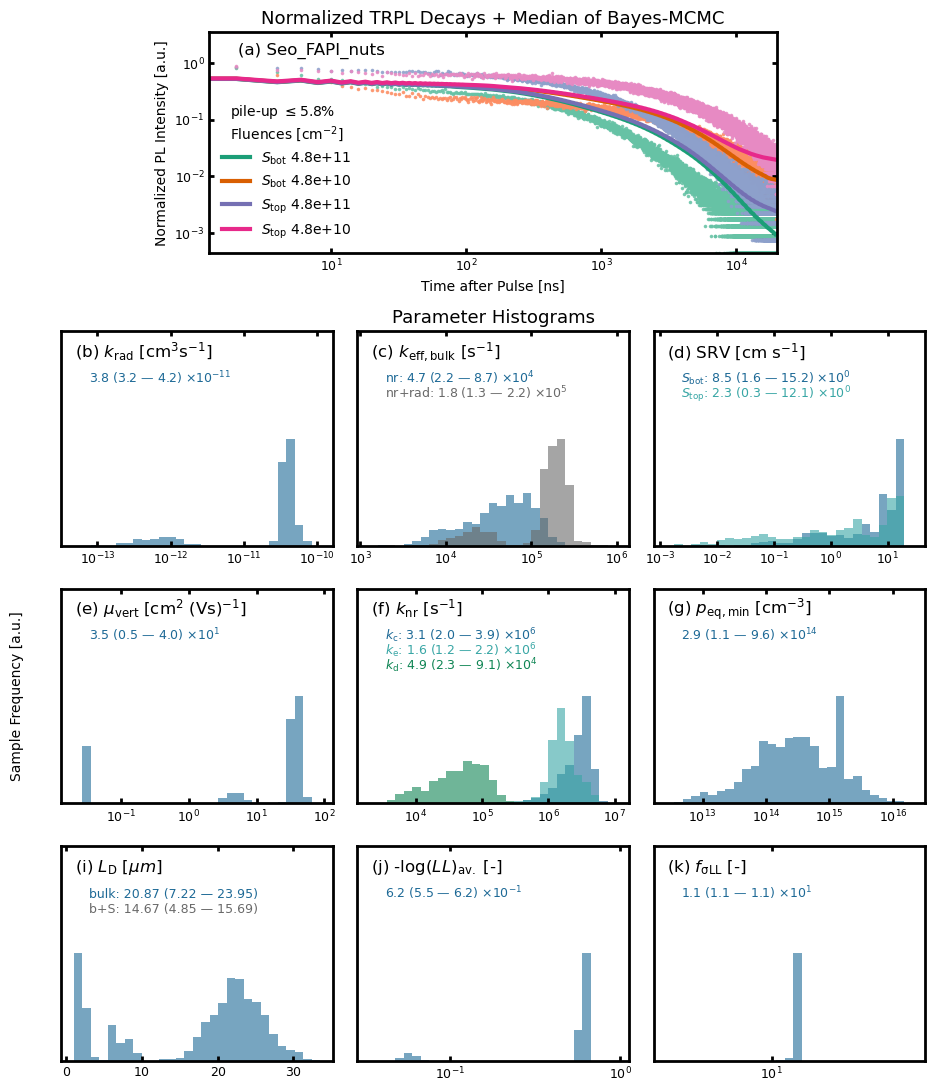

In [3]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\MKC06_Bayes\5_Data Collection\TRPL\2023_07_20_Bayes_Seongrok_FAPI"
trace_file = r"Seo_FAPI_nuts_trace_2024-11-28_212206.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'bot'
side_2 = 'top'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off = Bayes_TRPL_Utils(folder, trace_file)
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off)

Files ready...
(10, 1000)


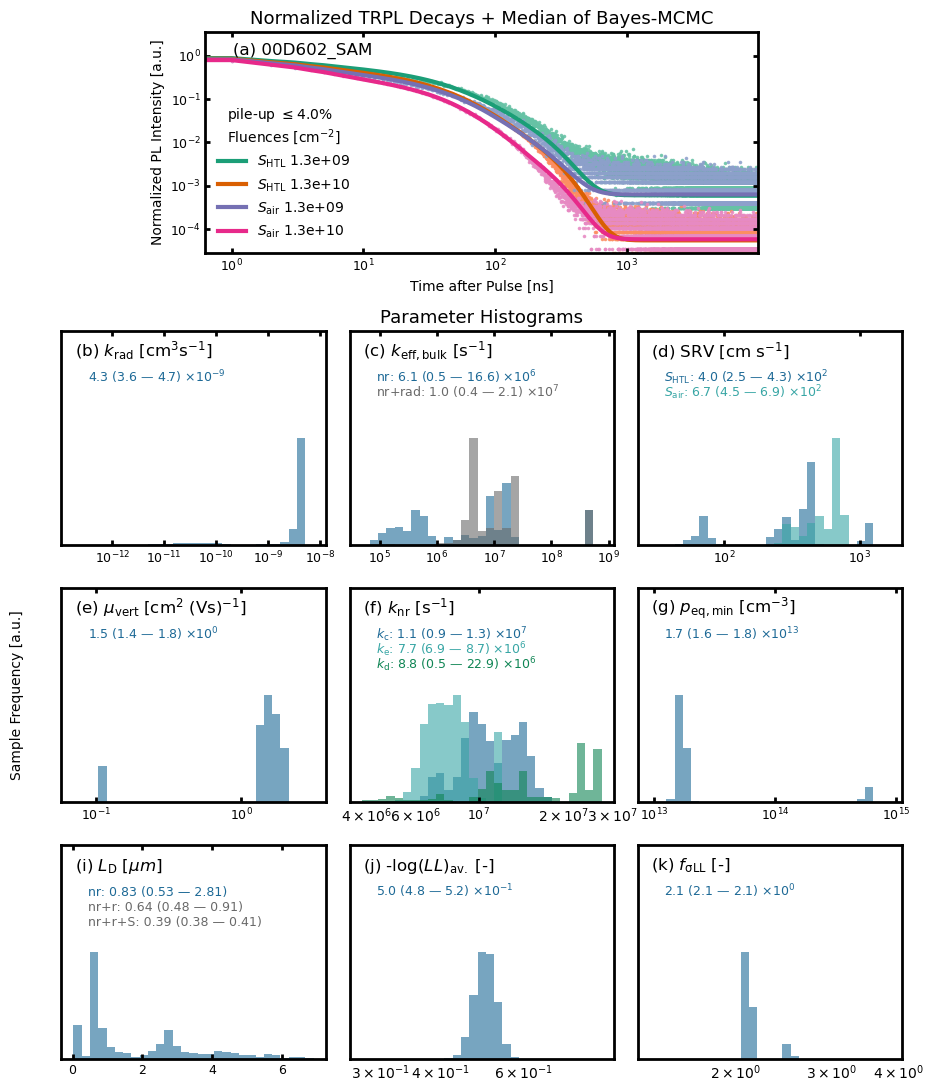

In [3]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Fengning_TRPL\TRPL-PLQE_Ageing_Manuel_SAMPTAA\TRPL_Data\2024_03_26_Fengning_Ageing_0hrs_TRPL"
trace_file = r"00D602_SAM_trace_2024-12-04_145129.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'HTL'
side_2 = 'air'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off = Bayes_TRPL_Utils(folder, trace_file)

trace = az.from_netcdf(f'{folder}/{trace_file}')
filter = np.where(trace.posterior.mu_vert.values.ravel() > 0)  # True if all values, else define a filter, for example:  np.where(trace.posterior.mu_vert.values.ravel() < 1)
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off, filter)

In [3]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Fengning_TRPL\TRPL-PLQE-Ageing_Manuel_0924_C8\TRPL\20240906_405NM"
trace_file = r"EE3D_trace_2024-12-04_134054.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'HTL'
side_2 = 'air'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off = Bayes_TRPL_Utils(folder, trace_file)

trace = az.from_netcdf(f'{folder}/{trace_file}')
filter = np.where(trace.posterior.k_rad.values.ravel() > 0)  # define a filter, for example:  np.where(trace.posterior.mu_vert.values.ravel() < 1)
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off, filter)

Files ready...
(10, 1000)


In [25]:
S_sum = test_trace.posterior.S_1.values.ravel()[filter] + test_trace.posterior.S_2.values.ravel()[filter]
kS = S_sum/550e-7

print(np.median(kS))
print(np.quantile(kS,0.25))
print(np.quantile(kS,0.75))
print(np.log10(np.median(kS)))

9032673.763033966
8845490.512765743
10701881.220750432
6.95581632491495


In [26]:
k = True
print(test_trace.posterior.k_rad.values[k])

[[[4.95970478e-09 4.95970478e-09 4.95970478e-09 ... 4.98480600e-09
   4.93204368e-09 4.94395376e-09]
  [4.91502181e-09 4.91502181e-09 4.91502181e-09 ... 4.21489103e-09
   4.21489103e-09 4.21489103e-09]
  [4.93203970e-09 4.93203970e-09 4.93099010e-09 ... 4.94209968e-09
   4.94209968e-09 4.94209968e-09]
  ...
  [4.47211831e-09 4.47211831e-09 4.47211831e-09 ... 4.50766722e-09
   4.46919054e-09 4.46919054e-09]
  [2.56991983e-11 2.56991983e-11 2.56991983e-11 ... 2.67654337e-11
   2.67654337e-11 2.67654337e-11]
  [1.09133119e-11 3.66364774e-11 3.66364774e-11 ... 7.42393985e-12
   7.42393985e-12 7.42393985e-12]]]


In [13]:
print(np.median(test_trace.posterior.k_rad.values[:,:,0]))


3.4913585078141918e-09


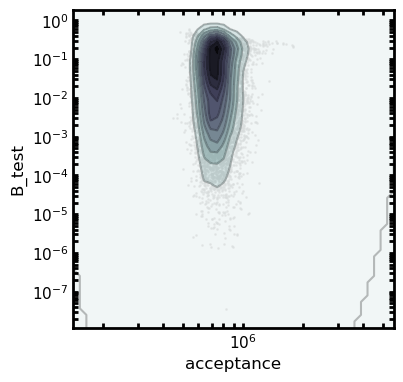

In [15]:
kd = df_save['k_emission(s-1)']
keff = df_save['k_nr_eff(s-1)']

corner_plot_single(kd, keff/kd, 'acceptance', 'B_test', ' ')

(10, 2000)


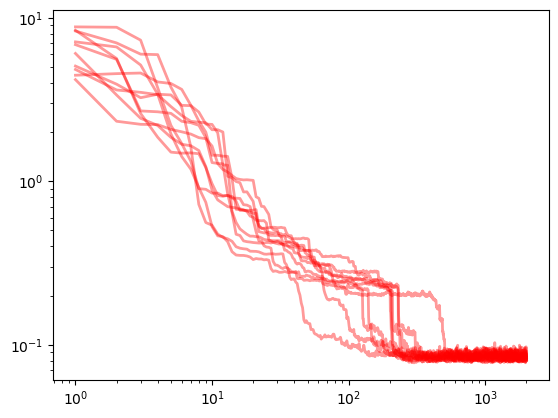

In [4]:
data_folder_trpl = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\MKC06_Bayes\5_Data Collection\TRPL\2023_07_20_Bayes_Seongrok_FAPI"


trace_name2 = r"Seo_FAPI_nuts_trace_2024-11-25_113743.nc"
trace2= az.from_netcdf(f'{data_folder_trpl}/{trace_name2}')
warmup_LL2 = trace2.warmup_posterior.Logp.values/(200*4)
post_LL2 = trace2.posterior.Logp.values/(200*4)

LL2 = np.concatenate((warmup_LL2, post_LL2), axis=1)
print(np.shape(LL2))

x_loglik2 = np.arange(0,np.shape(LL2)[1])
plt.plot(x_loglik2+1,LL2.T, color='red', linewidth=2, alpha=0.4)

plt.xscale('log')
plt.yscale('log')
plt.show()

17.999999999999996


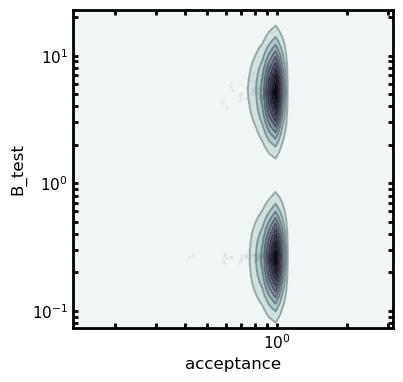

In [22]:
A = test_trace.sample_stats.acceptance_rate.values.ravel()
B = test_trace.posterior.mu_vert.values.ravel()

corner_plot_single(A, B, 'acceptance', 'B_test', ' ')


print(600e-7*600e-7/2e-9/0.025/4)

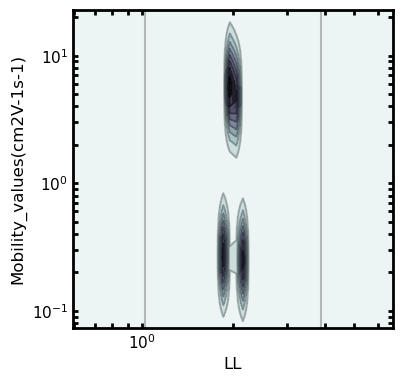

In [23]:
A_test = 'LL'
B_test = 'Mobility_values(cm2V-1s-1)'

corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')


In [33]:
p_eq = np.median(test_trace.posterior.P_0_list.values, axis=(0,1))*1e12
print(p_eq)


[4.56703003e+16 4.92758767e+12 6.70485872e+16]


Files ready...


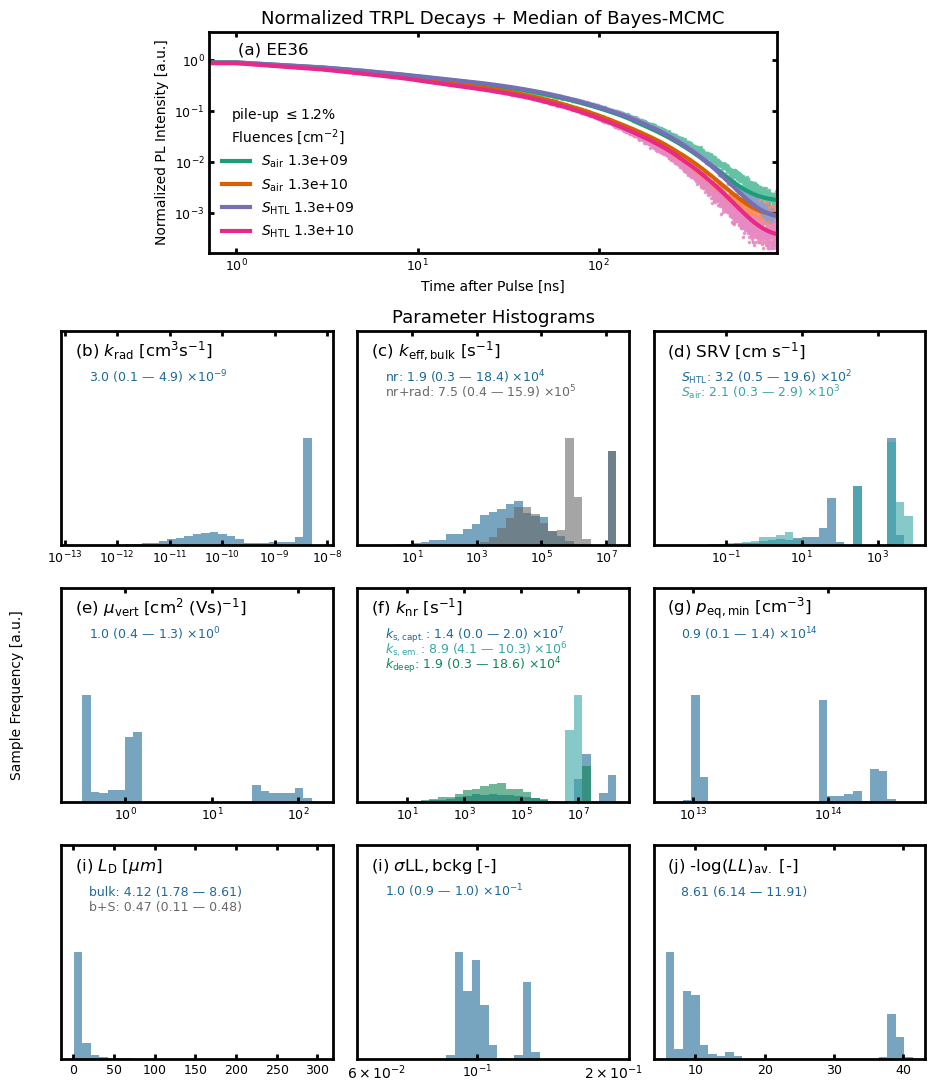

In [13]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Fengning_TRPL\TRPL-PLQE-Ageing_Manuel_0924\TRPL\20240913_405NM_ageing"
trace_file = r"EE36_trace_2024-11-12_134222.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'HTL'
side_2 = 'air'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, model, bckg_list = Bayes_TRPL_Utils(folder, trace_file)
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, model, bckg_list)

In [29]:
p_eq = np.median(test_trace.posterior.P_0_list.values, axis=(0,1))*1e12
#print('{:.1e}'.format(p_eq))
print('{:.2e}'.format(5e-9*1e14*1e14))

density_est = 1e16 - 1e16*2e2/550e-7*1e3*1e-9
print('{:.2e}'.format(density_est))

print(p_eq)

5.00e+19
-2.64e+16
[3.69635419e+14 3.17018007e+14 6.96208861e+13 3.06840597e+13]


Files ready...


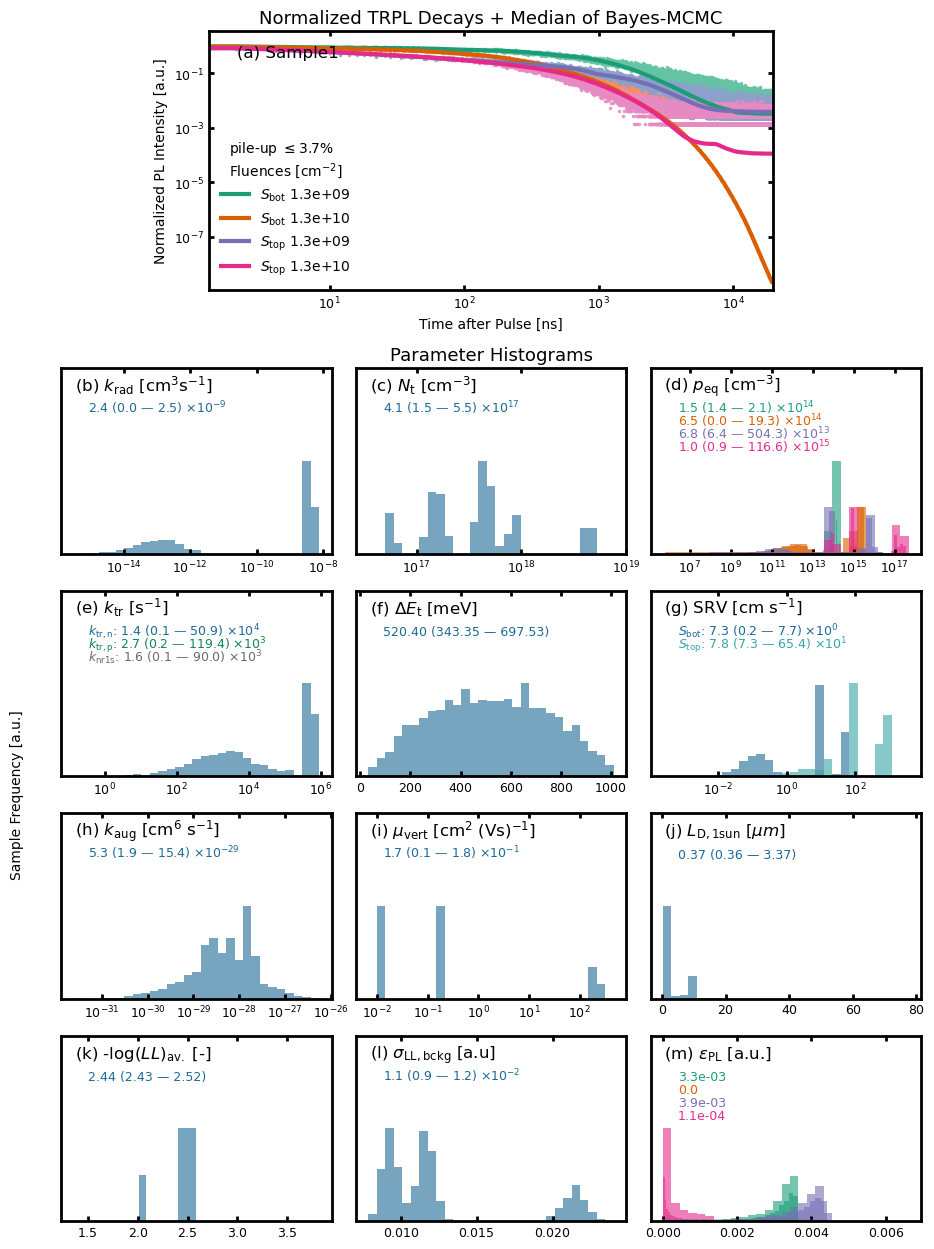

In [18]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Junke\TRPL_2024_07_10_Junke-Rahul_Chloride_additves"
trace_file = r"Sample1_trace_2024-10-14_144741.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'bot'
side_2 = 'top'
SRV_display = 'topbot' # 'topbot' or 'upperlower'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing = Bayes_TRPL_Utils(folder, trace_file)

scaling = 'log'
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display)

In [15]:
print(str("1 sun estimate: " + '{:.2e}'.format(one_sun_carrier_density) + " cm^-3"))

1 sun estimate: 2.46e+15 cm^-3


In [ ]:
n0 = np.array([1.08540620e+15, 8.40121106e+14, 8.00968467e+15, 5.10579470e+15])
p0 = np.array([7.39039030e+15, 4.73512897e+15, 3.69042464e+16, 2.25185604e+16])
print(p0-n0)

[6.30498410e+15 3.89500786e+15 2.88945617e+16 1.74127657e+16]


In [3]:
#D = df_save['Mobility']*(1.380649e-23*292/1.6021766e-19)
#test_parameter = 1/(2*D*np.pi**2/(600e-7**2))*1e9

test_parameter = df_save['k_bulk1sun(s-1)']
#test_parameter = df_save['k_bulk1sun(s-1)']
#test_parameter = df_save['S_2']/600e-7
#test_parameter = df_save['Mobility']

print(np.median(test_parameter))
print(np.median(test_parameter)-np.quantile(test_parameter,0.25))
print(np.quantile(test_parameter,0.75)-np.median(test_parameter))
print(np.log10(np.median(test_parameter)))

3518.7672992710004
2760.31995504643
15732.395285155355
3.5463905473171176


In [ ]:
test_trace.sample_stats.accept

Inference data with groups:
	> posterior
	> sample_stats

4.9188730745273695e-33


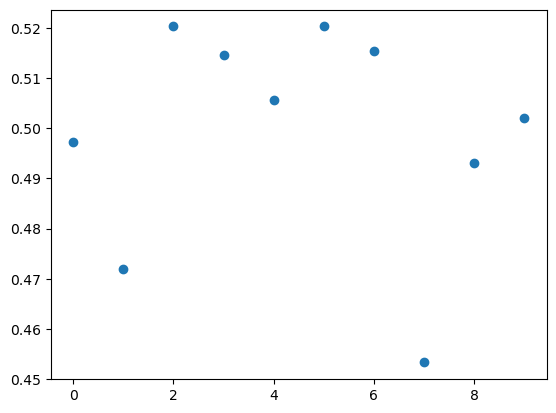

In [71]:
print(test_trace.sample_stats.accept.values[0,1,0])

array = test_trace.sample_stats.accepted.values[:,-1000:,:]



plt.scatter(np.arange(np.shape(array)[0]), np.mean(array, axis=(1,2)).T)
#plt.ylim(0,1)

# 2D Cornerplots

In [6]:
df_save

,k_rad_S1(cm3s-1),k_rad_S2(cm3s-1),k_capture(s-1),k_emission(s-1),k_deep(s-1),k_nr1sun(s-1),k_bulk1sun(s-1),S_1(cm s-1),S_2(cm s-1),S_lower(cm s-1),S_upper(cm s-1),Mobility_values(cm2V-1s-1),Diffusion_length(um),LL,P0_0,P0_1,P0_2,P0_3,p_eq_min(cm-3)
0,9.530880e-11,2.859359e-11,998555.320583,1.689048e+06,2232.389045,1402.964630,151533.589077,6.980216,1.116177,1.116177,6.980216,0.417082,2.631686,3.512984,5.685493e+15,1.371686e+14,2.008864e+16,1.546765e+15,1.371686e+14
1,9.530880e-11,2.859359e-11,998555.320583,1.689048e+06,988.061398,620.955920,150751.580367,6.980216,1.116177,1.116177,6.980216,0.417082,2.638503,3.513294,5.685493e+15,1.371686e+14,2.008864e+16,1.546765e+15,1.371686e+14
2,9.530880e-11,2.859359e-11,998555.320583,1.689048e+06,1488.546230,935.490037,151066.114484,6.980216,1.116177,1.116177,6.980216,0.417082,2.635755,3.513248,5.685493e+15,1.371686e+14,2.008864e+16,1.546765e+15,1.371686e+14
3,9.530880e-11,2.859359e-11,998555.320583,1.689048e+06,1713.845270,1077.081211,151207.705658,6.980216,1.116177,1.116177,6.980216,0.417082,2.634520,3.513193,5.685493e+15,1.371686e+14,2.008864e+16,1.546765e+15,1.371686e+14
4,9.530880e-11,2.859359e-11,998555.320583,1.689048e+06,1713.845270,1077.081211,151207.705658,6.980216,1.116177,1.116177,6.980216,0.417082,2.634520,3.513193,5.685493e+15,1.371686e+14,2.008864e+16,1.546765e+15,1.371686e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.469962e-11,2.832674e-11,949995.199528,1.604608e+06,1176.024408,738.689412,149807.846117,1.017756,7.064804,1.017756,7.064804,0.415898,2.643040,3.510536,5.343644e+15,1.108491e+14,2.062155e+16,1.573209e+15,1.108491e+14
9996,9.469962e-11,2.832674e-11,949995.199528,1.604608e+06,542.842235,340.972354,149410.129059,1.017756,7.064804,1.017756,7.064804,0.415898,2.646556,3.510644,5.343644e+15,1.108491e+14,2.062155e+16,1.573209e+15,1.108491e+14
9997,9.469962e-11,2.832674e-11,949995.199528,1.604608e+06,542.842235,340.972354,149410.129059,1.017756,7.064804,1.017756,7.064804,0.415898,2.646556,3.510644,5.343644e+15,1.108491e+14,2.062155e+16,1.573209e+15,1.108491e+14
9998,9.469962e-11,2.832674e-11,949995.199528,1.604608e+06,542.842235,340.972354,149410.129059,1.017756,7.064804,1.017756,7.064804,0.415898,2.646556,3.510644,5.343644e+15,1.108491e+14,2.062155e+16,1.573209e+15,1.108491e+14


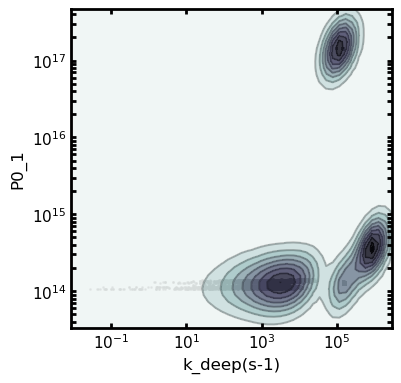

In [12]:
A_test = 'k_deep(s-1)'
B_test = 'P0_1'

corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')


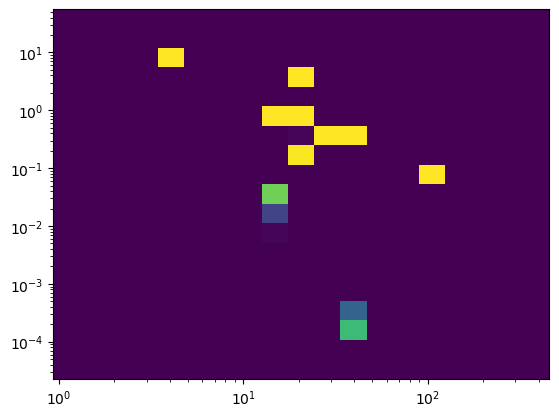

In [ ]:
x = df_save['S_1']
y = df_save['S_2']

bins_x = np.logspace(np.log10(x.min()/5),np.log10(x.max()*5),20)
bins_y = np.logspace(np.log10(y.min()/5),np.log10(y.max()*5),20)

plt.hist2d(x, y, bins=[bins_x,bins_y])

plt.xscale('log')
plt.yscale('log')
plt.show()

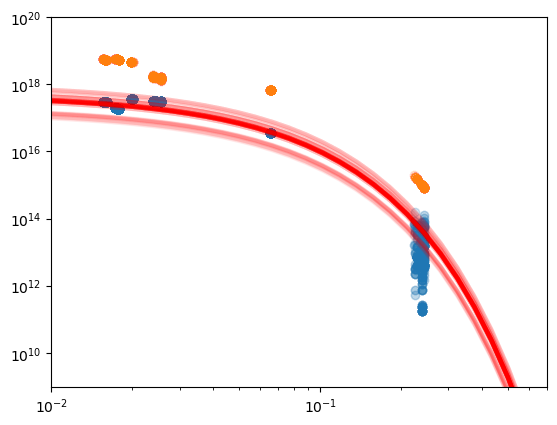

In [11]:
import random


A_test = 'td'
B_test = 'N_t(cm-3)'

#corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')

#Nt = np.logspace(15,20,10,base=10)
plt.scatter(df_save[A_test], df_save[B_test], alpha=0.1)

td = np.logspace(-6,0.2,100,base=10)

for i in np.arange(100):
    rand_pick = random.randint(0,len(df_save['Mobility'])-1)
    mu = 2*df_save['Mobility'][rand_pick]

    Nt = 1e17*(27/mu -1)*np.exp(-td/(8.6e-5*300))
    #td = np.log10(Nt/1e18)

    #plt.plot(Nt, td)
    #mu_calc = 27/(1e19/1e18*np.exp(td/(8.6e-5*292))+1)

    plt.plot(td, Nt, c='red', alpha=0.05, linewidth=3)

plt.scatter(df_save[A_test], 1e18 * (27/df_save['Mobility']-1) * np.exp(-df_save['td']/(8.61733e-5*292)), alpha=0.01)

plt.xlim(1e-2,0.7)
plt.ylim(1e9,1e20)
plt.xscale('log')
plt.yscale('log')

In [ ]:
N_t_shallow = 1e18 * (27/(df_save['Mobility'])-1) * np.exp(-df_save['td']/(8.61733e-5*292))

mu_D = 27/(1 + df_save['N_t(cm-3)']/1e18*np.exp(df_save['td']/(8.6e-5*292)))

print(np.median(N_t_shallow))

1.890044180571069e+18


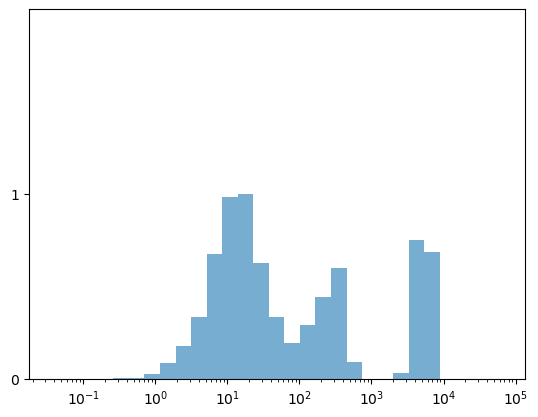

1366.0


In [ ]:
test_param = df_save['k_nr1sun']


logbins = np.logspace(np.log10(test_param.min()/10), np.log10(test_param.max()*10),30)

x,y, _ = plt.hist(test_param, bins=logbins, alpha=0.6)

plt.xscale('log')
plt.ylim(bottom=0, top=2*x.max())
plt.yticks([0,x.max()], labels=[0,1])
plt.show()
print(x.max())

In [ ]:
A_test = "k_trapping(s-1)"
B_test = "k_trapping1(s-1)"



#corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')

A = df_save[A_test].ravel()
B = df_save[B_test].ravel()

A = A[np.where(B != 0)]
B = B[np.where(B != 0)]
A = A[np.where(A != 0)]
B = B[np.where(A != 0)]

corner_plot_single(A, B, A_test, B_test, ' ')


KeyError: 'S_2'

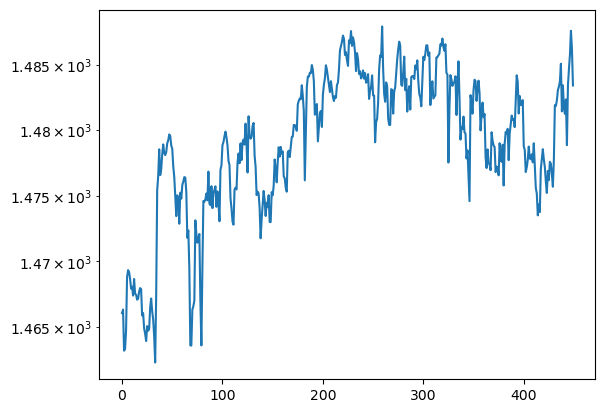

In [13]:
plt.semilogy(np.arange(len(df_save['LL'][50:500])),df_save['LL'][50:500])

In [ ]:
print(np.mean(df_save['sigma_L']))

0.046997602782795835


In [ ]:
print('{:.2e}'.format(np.mean(df_save['S_1'])))
print('{:.2e}'.format(np.std(df_save['S_1'])))

2.17e+00
6.16e+00


In [ ]:
k1 = 2e6
ne_1 = 1e20

print(k1*1/(2*1e17+ne_1))

1.9960079840319362e-14


In [ ]:
prod = df_save['S_1'] * df_save['S_2']
sum = df_save['S_1'] + df_save['S_2']

diff = df_save['S_1'] / df_save['S_2']

b_factor = prod/((sum/2)**2)

print(np.mean(prod))

2.498533623745121


In [ ]:
print(np.sqrt(1e36 * np.exp(-1.55/(8.6e-5*300))))

90018.63504819825


In [ ]:
G = np.min(Fluences)/600e-7 * 50000

print(G)

1.2700566666666667e+20


In [ ]:

from scipy.optimize import root

ne_1 = 1e18 * np.exp(-df_save['td']/(8.6e-5 * 292))

Diff = df_save['Mobility']*(1.380649e-23*292/1.6021766e-19)*np.pi**2/(600e-7**2)

def rate_equations(vars, Gen, kc_n, ne_1, krad,  S_sum, Diff):            
        ### Pseudo-Equilibrium at each time-point
        n_dens = vars
        
        dn_dt = Gen - (krad)*(n_dens**2) - (kc_n*5)*(n_dens**2)/(6*n_dens + ne_1)  - (S_sum)/(600e-7)*n_dens- 1e-28*n_dens**3
        
        return dn_dt

vals = []

for i in np.arange(100):

    vars_ss = root(rate_equations, 1e12, method='hybr', args=(G, df_save['k_trapping'][i], ne_1[i], df_save['k_rad'][i], df_save['S_1'][i] + df_save['S_2'][i], Diff[i]))
    
    ratio = vars_ss.x/(vars_ss.x + ne_1[i])

    N_t = df_save['n_eq'][i]/ratio
    
    vals.append(vars_ss.x)


In [ ]:
test_parameter = vals

print('{:.2e}'.format(np.median(test_parameter)))
print(np.quantile(test_parameter,0.25))
print(np.quantile(test_parameter,0.75))

2.75e+14
189013608600282.9
351897738801247.75


In [ ]:
ratio = np.median(test_parameter)/(2*np.median(test_parameter) + ne_1[10])



print(5e15/ratio)

NameError: name 'test_parameter' is not defined

In [ ]:
# steady-state trap density

N_t = 8e16
n_0 = 1.1e11/600e-7
freq_t = 1/(50000)*1e9

n_ts_list = []

for i in np.arange(1000):
    tau_c = 1/df_save['k_trapping'][i]*1e9
    tau_e = 1/(1e18*np.exp(-df_save['td'][i]/(8.6e-5*300)) * df_save['k_trapping'][i]/N_t) *1e9
    tau_n = 1/(df_save['k_rad'][i]*n_0) *1e9

    lambda1 = 1/tau_n + 1/tau_c + 1/tau_e *(1 - tau_c/tau_n)
    lambda2 = tau_c/(tau_e*tau_n)

    n_ts = n_0 * tau_e/tau_c * (np.exp(freq_t*lambda1) - np.exp(freq_t*lambda2))/((1-tau_e*lambda1)*np.exp(freq_t*lambda1) + tau_e*(lambda1-lambda2)*np.exp(freq_t*(lambda1+lambda2))-(1-tau_e*lambda2)*np.exp(freq_t*lambda2))


    #ratio = 

    n_ts_list.append(n_ts)


print(tau_n)
n_ts = np.median(n_ts_list)

print('{:.2e}'.format(n_ts))


735.2553034892076
5.44e+13


In [ ]:
S_only = df_save['S_2'].values + df_save['k_nr1sun']*600e-7



print(np.quantile(S_only,0.75))

551.8790175687601


[  8058.51240569  53689.327576   105461.17916714 157616.52595525
 209771.87274336 262066.47593573 314466.06151656 366621.40830467]
26179.93877991494


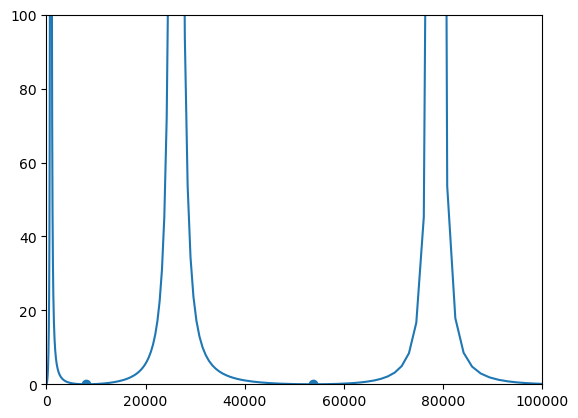

In [ ]:
from scipy.optimize import shgo

def f(x, D, a, b, thickness):
        #return (np.tan(x*thickness)+(D*(a)*x)/(b-D**2*x**2))**2
        return (np.tan(x*thickness)+(D*(a)*x)/((a/2)**2*b-D**2*x**2))**2


thickness = 600e-7

D_list = np.logspace(0, 3, 10)*0.025
a_list = np.logspace(0,5,10)
b_list = np.logspace(-5,0,10)

beta_0_matrix = np.zeros(shape=(len(D_list),len(a_list),len(b_list)))

D = 0.025*0.2
S1 = 20
S2 = 1

a = S1+S2
prod = S1*S2
b = prod/((a/2)**2)

betas1 = np.sort(shgo(f,bounds=[(0,0.8*np.pi/(thickness))], args = (D, a, b, thickness), sampling_method='sobol', n=1000).xl.flatten())
betas2 = np.sort(shgo(f,bounds=[(0,(8-0.5)*np.pi/(thickness))], args = (D, a, b, thickness), sampling_method='sobol', n=800).xl.flatten())


betas1 = np.delete(betas1, np.where(betas1 == 0.8*np.pi/(thickness)))


if np.abs(betas1[-1]-betas2[1])/betas1[-1] < 10:
    betas = np.append(betas1[1:], betas2[2:])
else:
    betas = np.append(betas1[1:], betas2[1:])



#betas = np.append(betas1[1:],betas2[1:])


x = np.logspace(-3,5.7,1000)


plt.plot(x, (np.tan(x*thickness)+(D*(a)*x)/((a/2)**2*b-D**2*x**2))**2)
plt.scatter(betas, np.zeros(np.shape(betas)))
plt.ylim(0,100)
plt.xlim(0,1e5)

print(betas)
print(0.5*np.pi/(thickness))

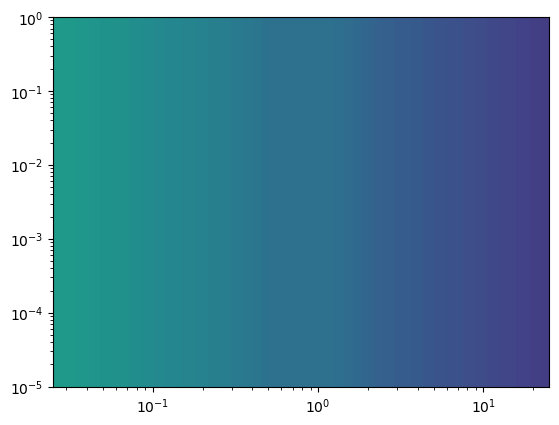

In [ ]:
plt.contourf(D_list, b_list, np.log10(beta_0_matrix[:,0,:].T), levels=np.linspace(-4,0,100))

plt.xscale('log')
plt.yscale('log')


In [ ]:
(np.pi/thickness)

52359.87755982988

In [ ]:
n_dens = 1e15
p_dens = 1e16
kc_n = 1e6
kc_p = 0
N_t = 1e18
td = 0.1

ne1 = 1e18*np.exp(-0.1/(8.5e-6*300))


ft1 = n_dens/(n_dens + kc_p/kc_n*p_dens+ne1)

ft2 = (p_dens-n_dens)/N_t

print(ft1, ft2)


0.9999999999999908 0.009


In [47]:
k_deep = 1.4e7
k_capture = 1e7
k_emission = 1e10

omega1 = k_deep + k_capture + k_emission
omega2 = np.sqrt(omega1**2 - 4*k_emission*k_deep)

lambda1 = k_deep + k_capture + k_emission*(1-k_deep/k_capture)
lambda2 = k_emission*k_deep/k_capture

#lambdatest = k_deep + k_capture + k_emission*(1 - k_deep/k_capture)


#A = -k_emission*((1-lambda1/k_emission))/(lambda1 - lambda2)
#B = k_emission*((1-lambda2/k_emission))/(lambda1 - lambda2) 


#k_eff = k_deep+np.sqrt(k_capture*k_emission)

#k_eff = A*lambda1 + B*lambda2

#print(A)
#print(B)
print(1/k_emission)

k_eff = 1/(1/k_deep + k_capture/k_deep * 1/k_emission)
lambdatest = 0.5*(lambda1+lambda2)

print('lambda1 {:.1e}'.format(lambda1))
#print('lambda2 {:.1e}'.format(lambda2))
print('keff {:.1e}'.format(k_eff))
print('lambdat {:.1e}'.format(lambdatest))

1e-10
lambda1 -4.0e+09
keff 1.4e+07
lambdat 5.0e+09
